<a href="https://colab.research.google.com/github/HYUNSOOLEE-6839/colab-Deep-Learning/blob/main/Object_Detection_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 공공 인공지능 API 활용
### 객체 검출(Object Detection)

In [2]:
with open('./static/keys/api_key.txt') as kfile:
            eai_key = kfile.read(100)

In [3]:
pip install urllib3

In [4]:
import urllib3
import json
import base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

In [35]:
import os
image_file = './static/data/park.jpg'
_, image_type = os.path.splitext(image_file)
image_type

'.jpg'

In [36]:
image_type = 'jpg' if image_type == '.jfif' else image_type[1:]
image_type

'jpg'

In [37]:
with open(image_file, 'rb') as file:
    image_contents = base64.b64encode(file.read()).decode('utf8')

In [38]:
request_json = {
    "request_id": "reserved field",
    "access_key": eai_key,
    "argument": {
        "file": image_contents,
        "type": image_type
    }
}

In [39]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

In [40]:
print("[responseCode]", response.status)

[responseCode] 200


In [41]:
import json
result = json.loads(response.data)
result

{'request_id': 'reserved field',
 'result': 0,
 'return_object': {'data': [{'class': 'bench',
    'confidence': '0.994464',
    'height': '36',
    'width': '57',
    'x': '16',
    'y': '129'},
   {'class': 'bench',
    'confidence': '0.870558',
    'height': '10',
    'width': '9',
    'x': '142',
    'y': '109'}]},
 'return_type': 'com.google.gson.JsonObject'}

In [42]:
obj_list = result['return_object']['data']
obj_list

[{'class': 'bench',
  'confidence': '0.994464',
  'height': '36',
  'width': '57',
  'x': '16',
  'y': '129'},
 {'class': 'bench',
  'confidence': '0.870558',
  'height': '10',
  'width': '9',
  'x': '142',
  'y': '109'}]

In [43]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
%matplotlib inline

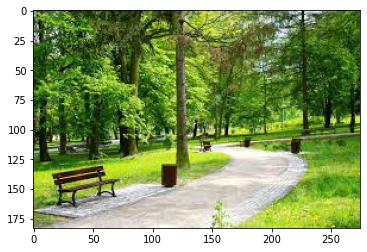

In [44]:
image = Image.open(image_file)
plt.imshow(image);

In [45]:
draw = ImageDraw.Draw(image)
for obj in obj_list:
    name = obj['class']
    x = int(obj['x'])
    y = int(obj['y'])
    w = int(obj['width'])
    h = int(obj['height'])
    draw.text((x+10,y+10), name, fill=(255,0,0))
    draw.rectangle(((x, y), (x+w, y+h)), outline=(255,0,0), width=2)

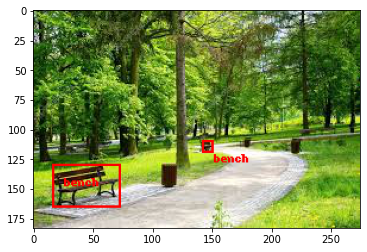

In [46]:
plt.imshow(image);

In [58]:
image_file = './static/data/market.jpg'
_, image_type = os.path.splitext(image_file)
image_type

'.jpg'

In [59]:
image_type = 'jpg' if image_type == '.jfif' else image_type[1:]
image_type

'jpg'

In [60]:
with open(image_file, 'rb') as file:
    image_contents = base64.b64encode(file.read()).decode('utf8')

In [61]:
request_json = {
    "request_id": "reserved field",
    "access_key": eai_key,
    "argument": {
        "file": image_contents,
        "type": image_type
    }
}

In [62]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

In [63]:
print("[responseCode]", response.status)

[responseCode] 200


In [64]:
result = json.loads(response.data)
result

{'request_id': 'reserved field',
 'result': 0,
 'return_object': {'data': [{'class': 'person',
    'confidence': '0.716622',
    'height': '28',
    'width': '15',
    'x': '68',
    'y': '155'}]},
 'return_type': 'com.google.gson.JsonObject'}

In [65]:
obj_list = result['return_object']['data']
obj_list

[{'class': 'person',
  'confidence': '0.716622',
  'height': '28',
  'width': '15',
  'x': '68',
  'y': '155'}]

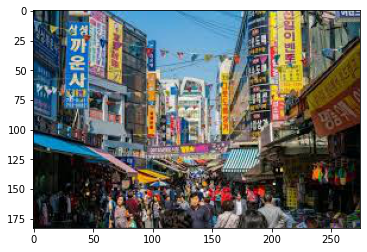

In [66]:
image = Image.open(image_file)
plt.imshow(image);

In [67]:
draw = ImageDraw.Draw(image)
for obj in obj_list:
    name = obj['class']
    x = int(obj['x'])
    y = int(obj['y'])
    w = int(obj['width'])
    h = int(obj['height'])
    draw.text((x+10,y+10), name, fill=(255,0,0))
    draw.rectangle(((x, y), (x+w, y+h)), outline=(255,0,0), width=2)

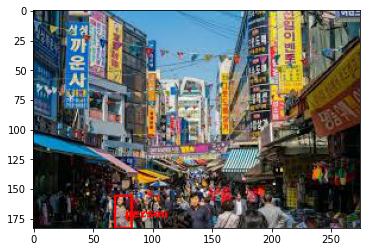

In [68]:
plt.imshow(image);